Import necessary libraries and functions:

In [140]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [92]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [184]:
from ipynb.fs.full.classification_functions import get_hist
from ipynb.fs.full.classification_functions import load_data
from ipynb.fs.full.classification_functions import predict

(optional) Run this cell to view all 164 (kinda poorly formatted) training images!

non-barnacle training images:
from img1:


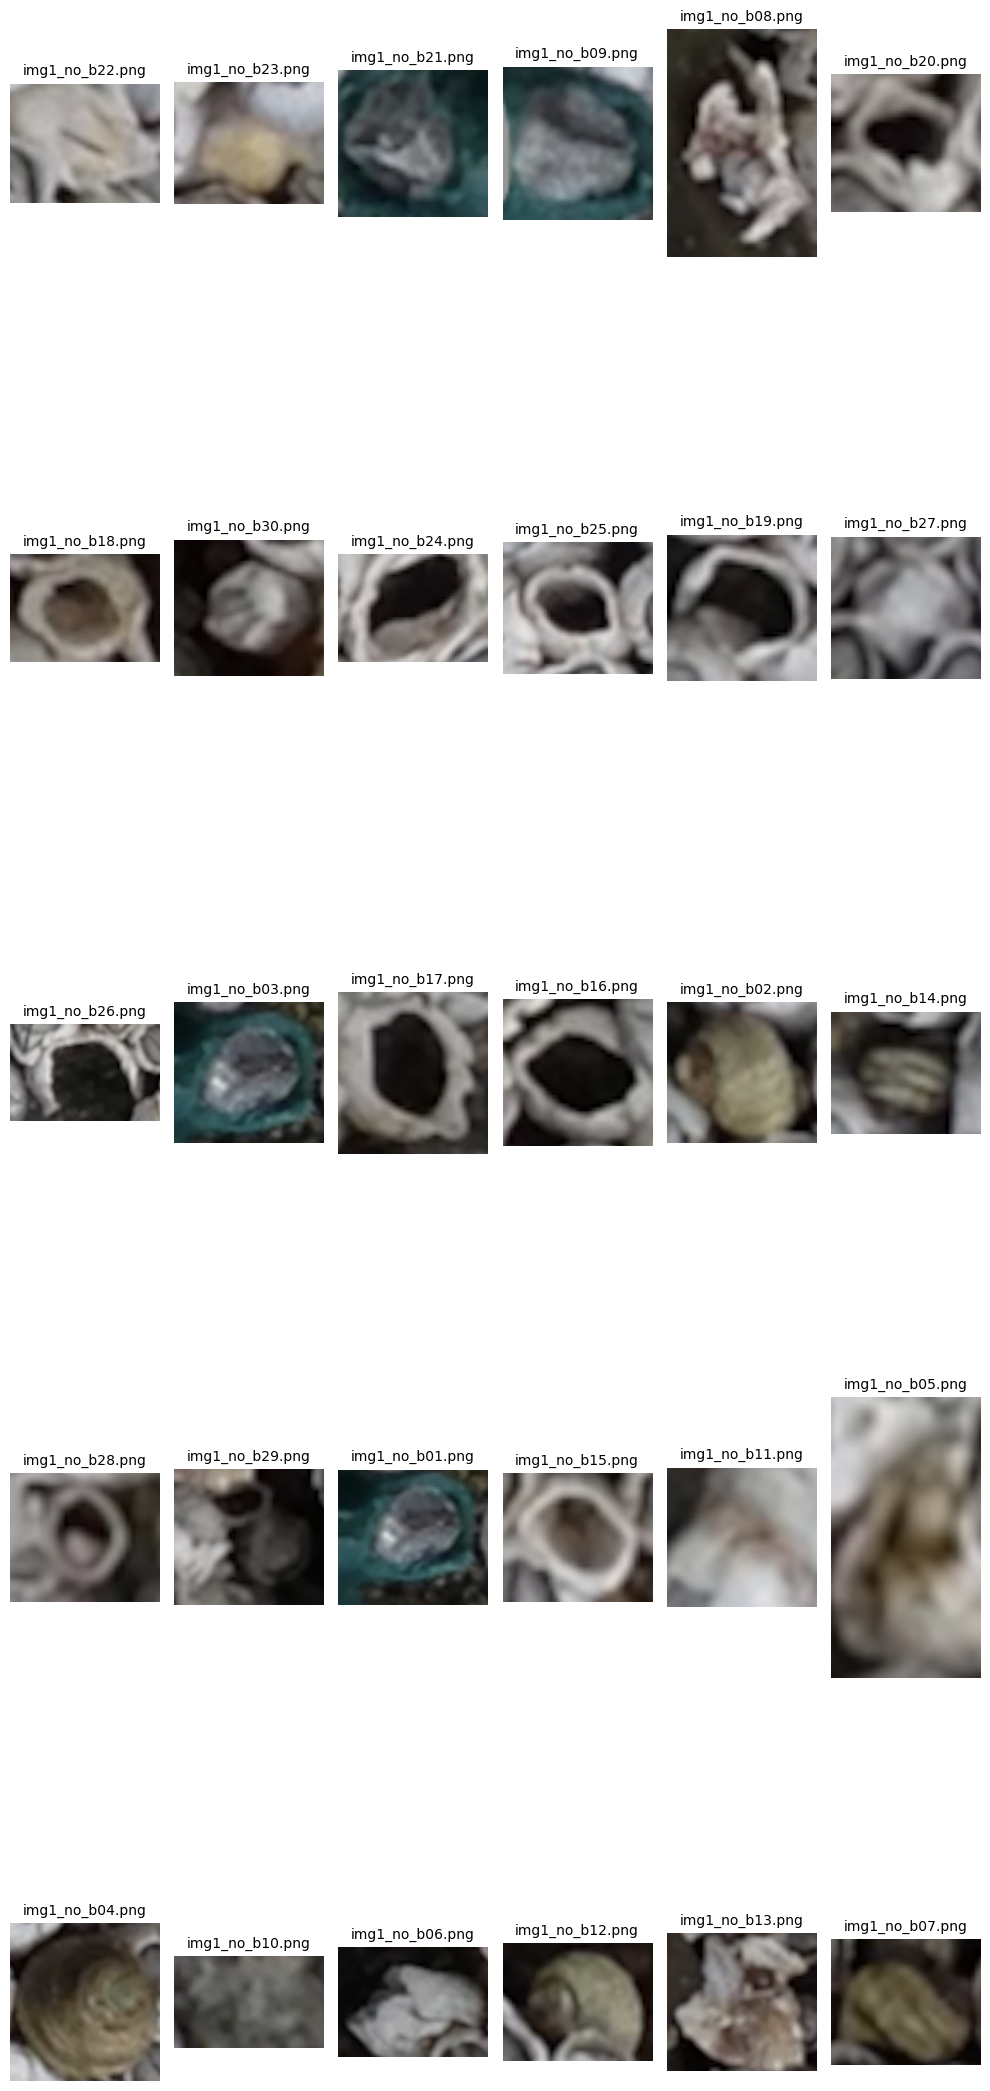

from img2:


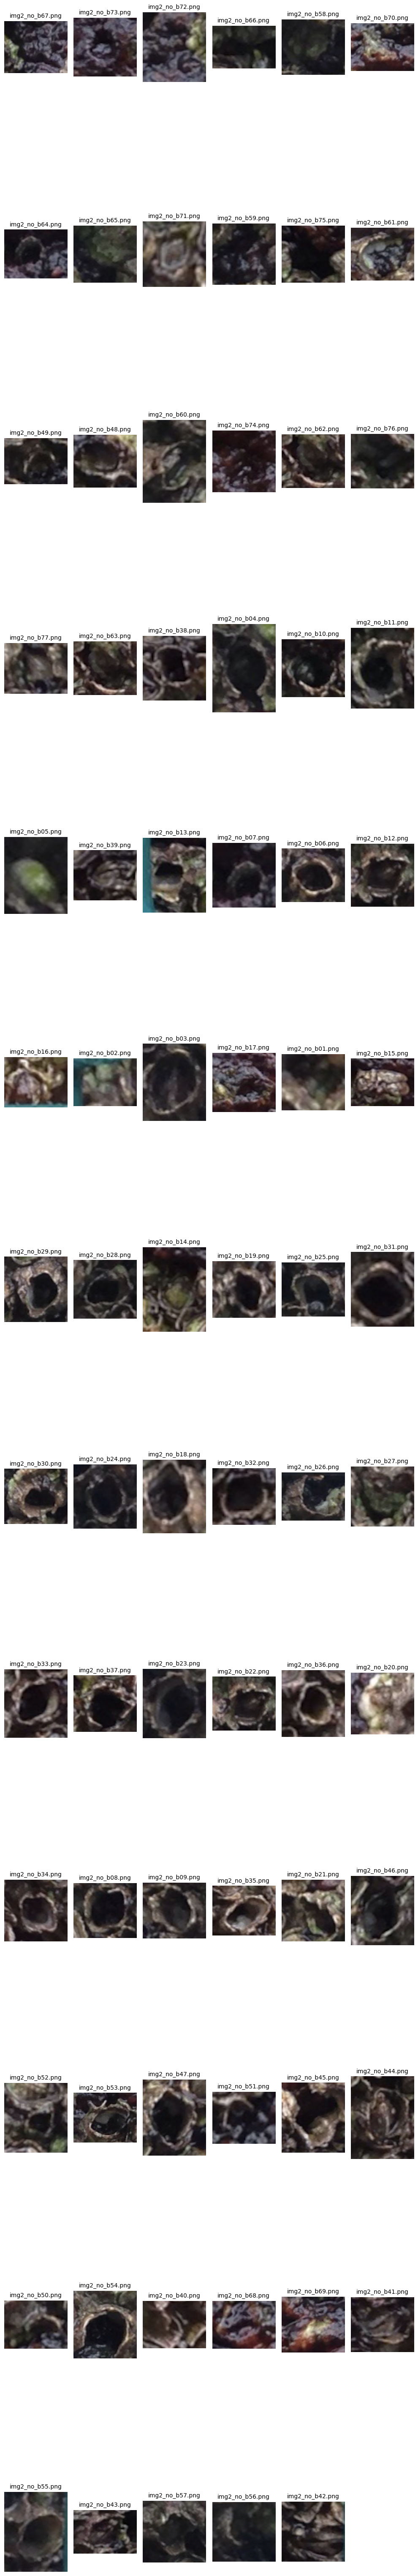

barnacle training images:
from img1:


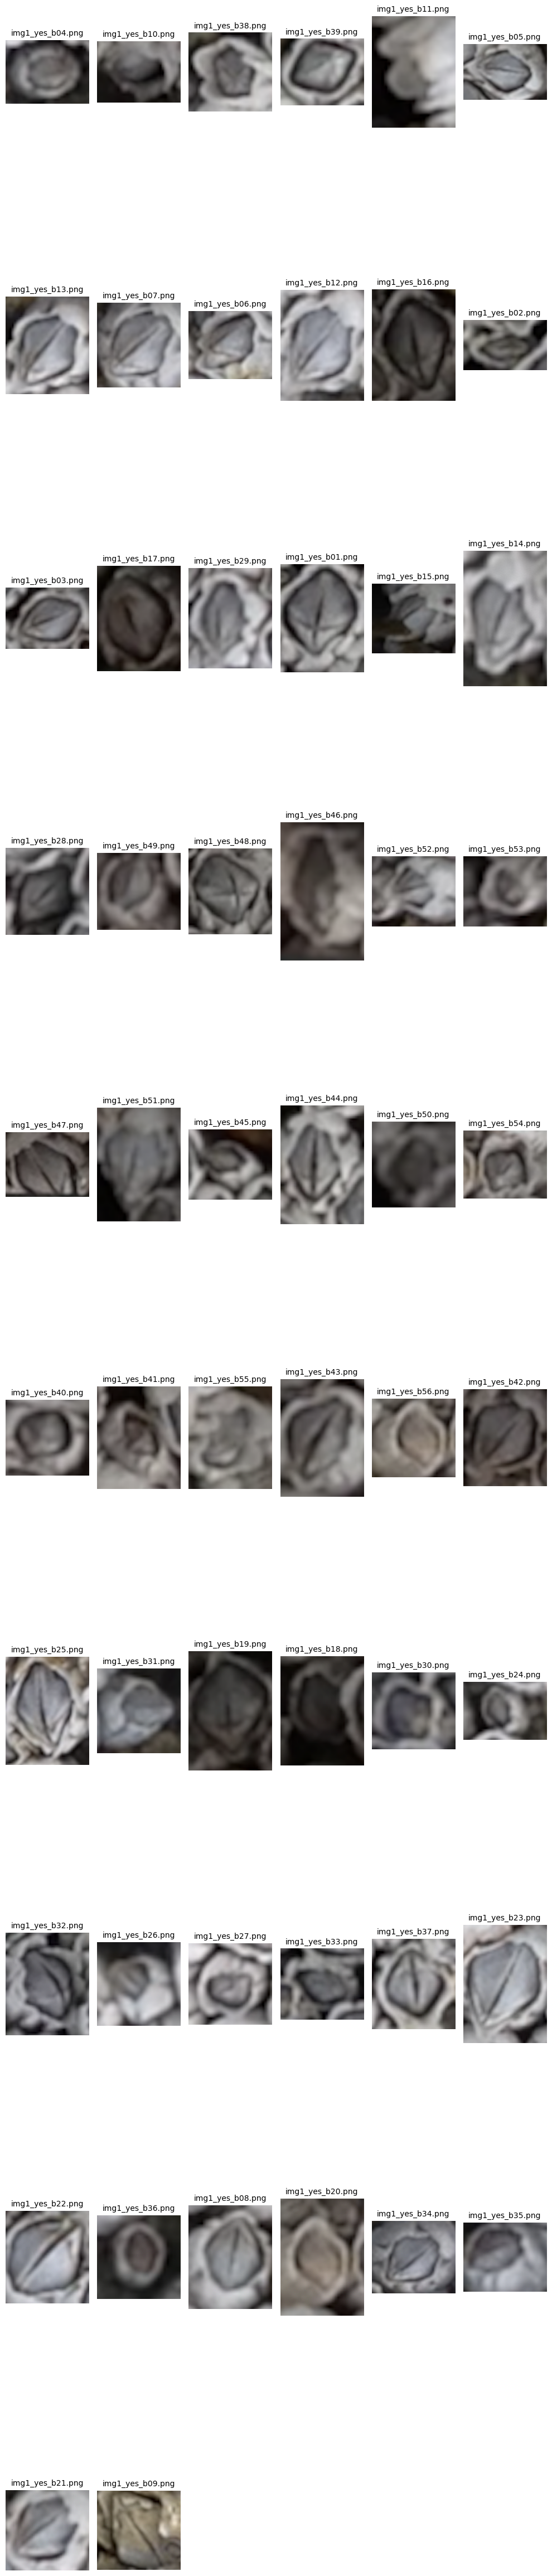

from img2:


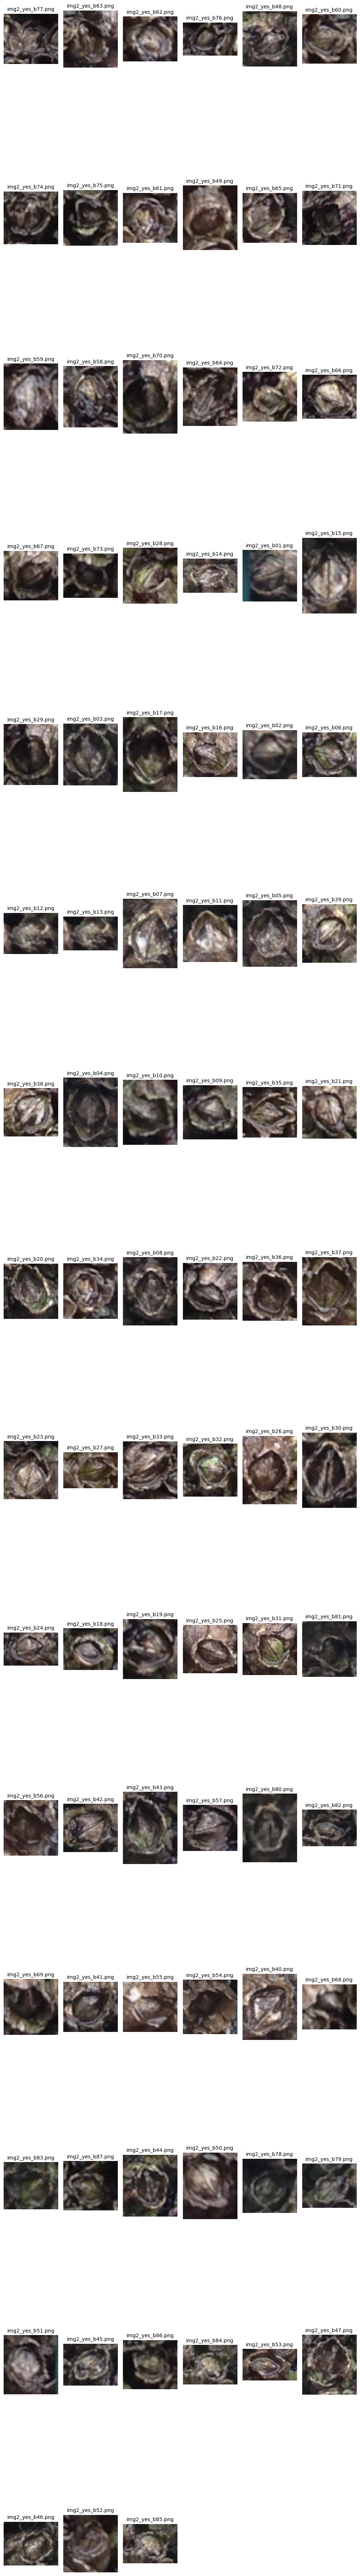

In [166]:
# !!!LOAD ALL THE SCREENSHOTS
# i was going to import this function but it didn't work :(((
%run classification_functions.ipynb 

print('non-barnacle training images:')
print('from img1:')
show_images('training/no_barnacle', 'img1')

print('from img2:')
show_images('training/no_barnacle', 'img2')

print('barnacle training images:')
print('from img1:')
show_images('training/yes_barnacle', 'img1')

print('from img2:')
show_images('training/yes_barnacle', 'img2')

Extract features (color histogram) and labels (either 'yes_barnacle' or 'no_barnacle') from all training images: 

In [208]:
features, labels = load_data('training', 'yes_barnacle', 'no_barnacle')

Split data into train/test sets and train random forest classifier:

In [209]:
# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=95, random_state=42)
clf.fit(x_train, y_train)

# eval on test set and display report 
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 no_barnacle       0.89      0.71      0.79        35
yes_barnacle       0.79      0.93      0.85        40

    accuracy                           0.83        75
   macro avg       0.84      0.82      0.82        75
weighted avg       0.84      0.83      0.82        75



Here, random forest classification was chosen over using deep learning as CNNs typically require very large datasets for training. I initially did consider using CNNs for barnacle detection but manually acquiring images of every barnacle in img1 and img2 would have been too time consuming (also my eye was spazzing out from looking at the pictures) as I did not have an automated process for extracting those images. 

Use this cell to predict whether individual images (from testing folder) are barnacles or not:

In [149]:
# use images of individual objects from unseen1 to test model
img = cv2.imread(path_here) # enter path of test image, ie. 'testing/no/unseen1_no_b10.png'
print(predict(img, clf))

yes_barnacle


Note: Since this prediction process only works on images of individual objects that may or may not be barnacles, passing an entire region of barnacles to it won't yield productive results. Some other process must ben in place to recognize instances of these smaller objects within images of many barnacles and should be used in conjunction with this prediction model. 

Find model accuracy for entire testing set of barnacle and non-barnacle images:

In [212]:
%run classification_functions.ipynb # import also failed for this function
accuracy = evaluate_model(clf, 'testing/yes', 'testing/no')

Accuracy: 82.29% (79/96)


Sidenote, this number used to be 86-something percent which is marginally more impressive but then I moved a function somewhere and it dropped to 82.29% and I still don't know why :(